In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error, explained_variance_score, max_error, confusion_matrix, f1_score, recall_score, roc_auc_score, roc_curve, precision_score, accuracy_score, classification_report

In [9]:
# Import predicted and actual values
predictions = pd.read_csv('../data/multiple_micronuclei/prediction/multiclass_10K_0/cellpose2_fv20_s0.7_xms60_yms60__predictions.csv')

In [11]:
# Binarize predictions
predictions["binary"] = (predictions['prediction'] > 0.5).astype(int)

In [15]:
# Round predictions
predictions["rounded"] = predictions['prediction'].apply(lambda x: round(x))

In [16]:
# Get wells from image name
predictions['well'] = predictions['image'].apply(lambda x: "_".join(x.split('_')[:-1]))

In [17]:
for i, group in predictions.groupby('well'):
    print(i)
    onegroup = group[group['binary']==1]
    break

12621_redo_brain_mets_nsclc_images_s04


In [18]:
onegroup

,image,prediction,binary,well,rounded
4,12621_redo_brain_mets_nsclc_images_s04_286.png,1.199418,1,12621_redo_brain_mets_nsclc_images_s04,1
5,12621_redo_brain_mets_nsclc_images_s04_4274.png,2.130360,1,12621_redo_brain_mets_nsclc_images_s04,2
32,12621_redo_brain_mets_nsclc_images_s04_4512.png,0.709072,1,12621_redo_brain_mets_nsclc_images_s04,1
74,12621_redo_brain_mets_nsclc_images_s04_2611.png,0.852814,1,12621_redo_brain_mets_nsclc_images_s04,1
100,12621_redo_brain_mets_nsclc_images_s04_3527.png,0.981343,1,12621_redo_brain_mets_nsclc_images_s04,1
...,...,...,...,...,...
38886,12621_redo_brain_mets_nsclc_images_s04_4251.png,0.780684,1,12621_redo_brain_mets_nsclc_images_s04,1
38892,12621_redo_brain_mets_nsclc_images_s04_2620.png,0.540623,1,12621_redo_brain_mets_nsclc_images_s04,1
38907,12621_redo_brain_mets_nsclc_images_s04_4279.png,0.620925,1,12621_redo_brain_mets_nsclc_images_s04,1
38910,12621_redo_brain_mets_nsclc_images_s04_3516.png,0.522520,1,12621_redo_brain_mets_nsclc_images_s04,1


In [50]:
print(explained_variance_score(predictions['targets'], predictions['rounded']))

0.8060672026018594


In [51]:
# Convert any negative scores in predictions to 0
predictions['scores_nn'] = predictions['scores'].apply(lambda x: 0 if x < 0 else x)

In [52]:
# Calculate roc_auc_score
roc_auc_score(predictions['targets'], predictions['scores_nn'])

ValueError: multi_class must be in ('ovo', 'ovr')

/Users/miguelibarra/.miniconda3/envs/stable/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot:>

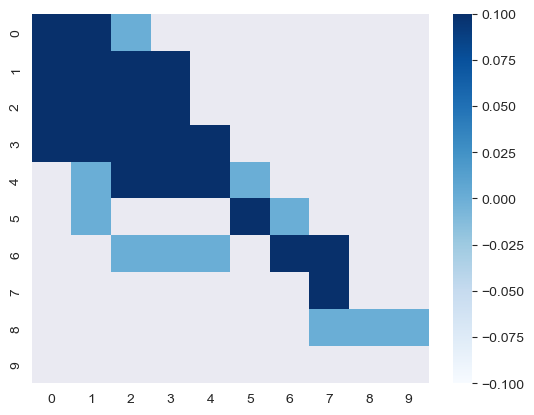

In [72]:
# binarize labels
nonzero_cm = pd.DataFrame(confusion_matrix(predictions['targets'], predictions['rounded']))
sns.heatmap(np.log(nonzero_cm), cmap='Blues')